In [19]:
# Change folder path
import os
os.chdir("/Users/yongganwu/repositories/machine_learning_exercise_claims")

# import
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import set_option
import matplotlib.pyplot as plt

In [2]:
# Reading CSV file
#data = np.genfromtxt('claim.sample.csv', delimiter=',',dtype=None)
from pandas import read_csv
data = read_csv('claim.sample.csv',dtype='str')

In [3]:
# peak of data
print (data.shape)
#print (data.dtypes)
data.head(5)

(472559, 29)


,Unnamed: 0,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,...,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
0,1,28849991,1,9583423,FA0001411002,0002,0128,RR8I,,,...,15036.21,110,7763000,0,M,H,,02,P00000000002,FH001310QB01
1,2,81404290,1,25210465,FA0001411002,0001,0024,AL7I,,A0205,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
2,3,81404290,2,25210465,FA0001411002,0001,0128,RR8I,,,...,27525.263805,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
3,4,81404290,3,25210465,FA0001411002,0001,0250,AL7I,,,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
4,5,81404290,4,25210465,FA0001411002,0001,0258,AL7I,,,...,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1


In [4]:
# get sample data to work with
#data = data[:5000]
print (data.shape)

(472559, 29)


In [5]:
# Start update each columns
# Remove the first columns
# all code have to re-run from here if something is wrong
set_option("display.max_columns",30) 
d = data.drop('Unnamed: 0', 1)
print (d.shape)
d.head(5)

(472559, 28)


,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
0,28849991,1,9583423,FA0001411002,0002,0128,RR8I,,,V5789,19356.96,,A,I,N,N,N,0,15036.21,110,7763000,0,M,H,,02,P00000000002,FH001310QB01
1,81404290,1,25210465,FA0001411002,0001,0024,AL7I,,A0205,V5789,0,,A,I,N,N,N,0,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
2,81404290,2,25210465,FA0001411002,0001,0128,RR8I,,,V5789,27099.744,PAI,A,I,N,N,N,0,27525.263805,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
3,81404290,3,25210465,FA0001411002,0001,0250,AL7I,,,V5789,2262.0978,,A,I,V,N,N,0,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1
4,81404290,4,25210465,FA0001411002,0001,0258,AL7I,,,V5789,284.712735,,A,I,V,N,N,0,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1


In [6]:
# Denial.Reason.Code
# function to clean Y value, replace " " with nan
y_negative = ["F13", "J8G", "JO5", "JB8", "JE1", "JC9", "JF1", "JF9", "JG1", "JPA", "JES"]
y_title = "Denial.Reason.Code"
y_title_new = "Denial.Reason.Code.new"
def clean_y(cell):
    cell = str(cell).replace("\"","")
    if cell in y_negative:
        return 1
    else:
        if cell == ' ':
            return np.nan
        else:
            return 0
cell = d[y_title][0]
print (cell)
clean_y(cell)
d[y_title_new] = [clean_y(i) for i in d[y_title]]
d[y_title_new].head(10)

0    NaN
1    NaN
2    0.0
3    NaN
4    NaN
5    0.0
6    NaN
7    NaN
8    NaN
9    NaN
Name: Denial.Reason.Code.new, dtype: float64

In [7]:
# remove not wanted rows
# need to do this first, because it might affect final analysis result
set_option("display.max_columns",30) 
d_sub=d[~np.isnan(d[y_title_new])]
print (d_sub.shape)
d_sub.head(5)

(146529, 29)


,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,Denial.Reason.Code.new
2,81404290,2,25210465,FA0001411002,0001,0128,RR8I,,,V5789,27099.744,PAI,A,I,N,N,N,0,27525.263805,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1,0.0
5,81404290,5,25210465,FA0001411002,0001,0259,AL7I,,,V5789,1081.39731,F05,A,I,V,N,N,0,0,110,20421600,0,M,H,,91,P00000000007,FH002451QPD1,0.0
21,84816790,1,25210465,FA0001411002,0001,0024,AL7I,,A0205,V5789,0,JA,,I,N,N,N,0,0,110,20421600,0,M,H,,02,P00000000007,FH001310QB01,0.0
22,84816790,5,25210465,FA0001411002,0001,0259,AL7I,,,V5789,1081.39731,JA,,I,N,N,N,0,0,110,20421600,0,M,H,,02,P00000000007,FH001310QB01,0.0
23,84816790,2,25210465,FA0001411002,0001,0128,RR8I,,,V5789,27099.744,JA,,I,N,N,N,0,0,110,20421600,0,M,H,,02,P00000000007,FH001310QB01,0.0


In [13]:
# number to number
names_num = [
    "Subscriber.Payment.Amount",
    "Provider.Payment.Amount",
    "Claim.Current.Status",
]

def cell_2_float(cell):
    cell = str(cell).replace("\"","")
    if cell == ' ':
        return np.nan
    else:
        return float(cell)
d_num = d_sub.copy()
for c in names_num:
    d_num["%s.new" % c] = [cell_2_float(i) for i in d_sub[c]]
    print (d_sub["%s.new" % c][:2])


2    0.0
5    0.0
Name: Subscriber.Payment.Amount.new, dtype: float64
2    27525.263805
5        0.000000
Name: Provider.Payment.Amount.new, dtype: float64
2    91.0
5    91.0
Name: Claim.Current.Status.new, dtype: float64


In [14]:
# Skew for each attribute
# Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
# squashed in one direction or another. Many machine learning algorithms assume a Gaussian
# distribution. Knowing that an attribute has a skew may allow you to perform data preparation
# to correct the skew and later improve the accuracy of your models. You can calculate the skew
# of each attribute using the skew() function on the Pandas DataFrame.
names_num_new = [n+'.new' for n in names_num]
d_skew = d_num[names_num_new].skew()
print (len(d_skew[abs(d_skew) > 2]))
print (d_skew[abs(d_skew) > 2])

# The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

# Need to normalized the data

3
Subscriber.Payment.Amount.new    214.900851
Provider.Payment.Amount.new       30.070821
Claim.Current.Status.new           2.764967
dtype: float64


In [15]:
# Normalization
# Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any 
# pair of samples.
# A lot of process need normalization to be correct

d_norm = d_num.copy()
normalizer = preprocessing.Normalizer().fit(d_num[names_num_new])

d_norm[names_num_new] = normalizer.transform(d_num[names_num_new])
d_norm[names_num_new].head(5)

,Subscriber.Payment.Amount.new,Provider.Payment.Amount.new,Claim.Current.Status.new
2,0.0,0.999995,0.003306
5,0.0,0.000000,1.000000
21,0.0,0.000000,1.000000
22,0.0,0.000000,1.000000
23,0.0,0.000000,1.000000


In [16]:
# Correlations Between Attributes
# Correlation refers to the relationship between two variables and how they may or may not
# change together. The most common method for calculating correlation is Pearson’s Correlation
# Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1
# or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
# correlation at all. Some machine learning algorithms like linear and logistic regression can suffer
# poor performance if there are highly correlated attributes in your dataset. As such, it is a good
# idea to review all of the pairwise correlations of the attributes in your dataset. You can use the
# corr() function on the Pandas DataFrame to calculate a correlation matrix.
set_option("display.max_columns",30) 
set_option('display.width', 100)
set_option('precision', 3)
d_corr = d_norm[names_num_new].corr(method='pearson')

# need to reduce the dimension

In [17]:
# get the highly corelated attributes
print (d_corr.shape)

for c in d_corr.columns:
    if len(d_corr[abs(d_corr[c]) > 0.8]) > 1:
        print (d_corr.index[abs(d_corr[c]) > 0.8])

# corelated fields 'Provider.Payment.Amount.new', 'Claim.Current.Status.new'

(3, 3)
Index(['Provider.Payment.Amount.new', 'Claim.Current.Status.new'], dtype='object')
Index(['Provider.Payment.Amount.new', 'Claim.Current.Status.new'], dtype='object')


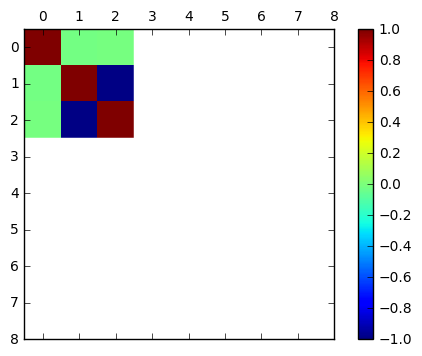

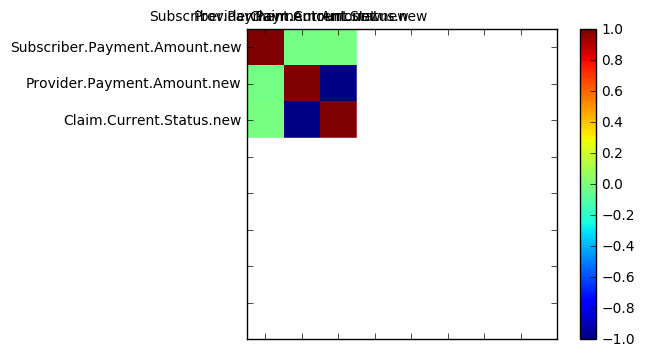

In [21]:
# Correlation Matrix Plot

# Correlation gives an indication of how related the changes are between two variables. 
# If two variables change in the same direction they are positively correlated. If the change in opposite 
# directions together (one goes up, one goes down), then they are negatively correlated.

# You can calculate the correlation between each pair of attributes. This is called a correlation matrix. 
# You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

# This is useful to know, because some machine learning algorithms like linear and logistic regression 
# can have poor performance if there are highly correlated input variables in your data.

correlations = d_norm[names_num_new].corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names_num_new)
ax.set_yticklabels(names_num_new)
plt.show()

# only keep one of the corelated fields, check the null value

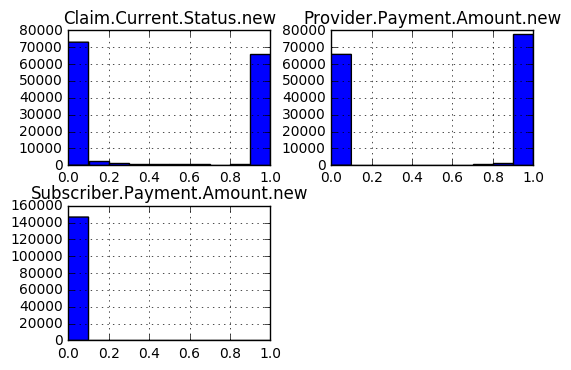

In [23]:
# Univariate Histograms
# A fast way to get an idea of the distribution of each attribute is to look at histograms.
# Histograms group data into bins and provide you a count of the number of observations in each bin. 
# From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian’, 
# skewed or even has an exponential distribution. It can also help you see possible outliers.

#d_norm[names_num_new].hist(layout=(10,3),figsize=(6, 15))
d_norm[names_num_new].hist()
plt.show()

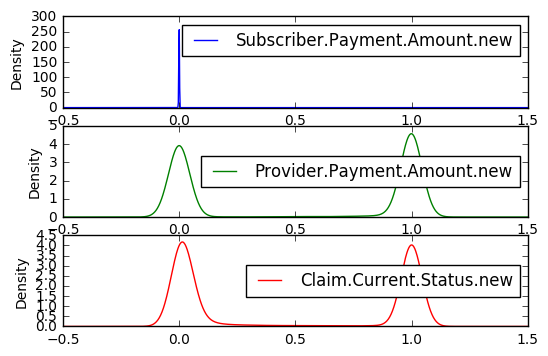

In [25]:
# Density Plots
# Density plots are another way of getting a quick idea of the distribution of each attribute. 
# The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, 
# much like your eye tried to do with the histograms.
#d_norm.plot(kind='density', subplots=True, layout=(10,3), sharex=False ,figsize=(7, 15))
d_norm[names_num_new].plot(kind='density', subplots=True, sharex=False)
plt.show()

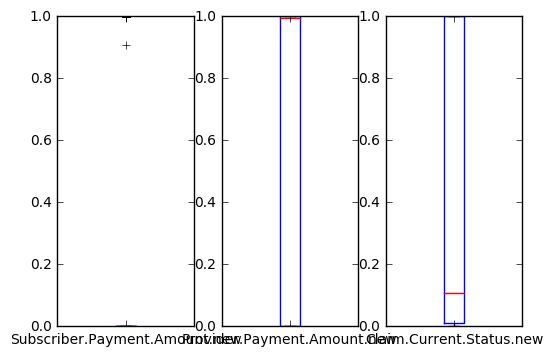

In [26]:
# Box and Whisker Plots

# Another useful way to review the distribution of each attribute is to use Box and Whisker Plots 
# or boxplots for short.

# Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) 
# and a box around the 25th and 75th percentiles (the middle 50% of the data). 
# The whiskers give an idea of the spread of the data and dots outside of the whiskers show 
# candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

# d_norm[names_num_new].plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False ,figsize=(6, 15))
d_norm[names_num_new].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

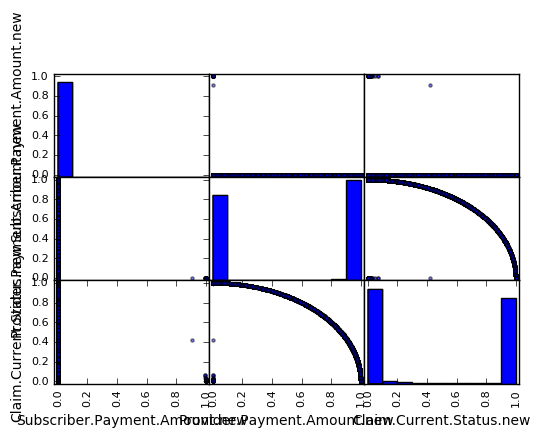

In [27]:
# Scatterplot Matrix

# A scatterplot shows the relationship between two variables as dots in two dimensions, 
# one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. 
# Drawing all these scatterplots together is called a scatterplot matrix.

# Scatter plots are useful for spotting structured relationships between variables, like whether you could 
# summarize the relationship between two variables with a line. Attributes with structured relationships 
# may also be correlated and good candidates for removal from your dataset.

from pandas.tools.plotting import scatter_matrix
scatter_matrix(d_norm[names_num_new])
plt.show()

In [32]:
# Missing Values Ratio
# For feature selection
print (len(d_norm))
for c in d_norm.columns.values:
    r = np.count_nonzero(d_norm[c].isnull())/len(d_norm)
    print ("%s: %s" % (c, r))

146529
Claim.Number: 0.0
Claim.Line.Number: 0.0
Member.ID: 0.0
Provider.ID: 0.0
Line.Of.Business.ID: 0.0
Revenue.Code: 0.0
Service.Code: 0.0
Place.Of.Service.Code: 0.0
Procedure.Code: 0.0
Diagnosis.Code: 0.0
Claim.Charge.Amount: 0.0
Denial.Reason.Code: 0.0
Price.Index: 0.0
In.Out.Of.Network: 0.0
Reference.Index: 0.0
Pricing.Index: 0.0
Capitation.Index: 0.0
Subscriber.Payment.Amount: 0.0
Provider.Payment.Amount: 0.0
Group.Index: 0.0
Subscriber.Index: 0.0
Subgroup.Index: 0.0
Claim.Type: 0.0
Claim.Subscriber.Type: 0.0
Claim.Pre.Prince.Index: 0.0
Claim.Current.Status: 0.0
Network.ID: 0.0
Agreement.ID: 0.0
Denial.Reason.Code.new: 0.0
Subscriber.Payment.Amount.new: 0.0
Provider.Payment.Amount.new: 0.0
Claim.Current.Status.new: 0.0


In [42]:
# Low Variance Filter.

d_var = np.var(d_norm[names_num_new])
print (d_var)
print (d_var[d_var < 0.03])

# Subscriber.Payment.Amount.new need to be deleted

Subscriber.Payment.Amount.new    2.511e-04
Provider.Payment.Amount.new      2.432e-01
Claim.Current.Status.new         2.330e-01
dtype: float64
Subscriber.Payment.Amount.new    2.511e-04
dtype: float64


In [33]:
names_cat = [
    "Claim.Number",
    "Claim.Line.Number",
    "Member.ID",
    "Line.Of.Business.ID",
    "Provider.ID",
    "Revenue.Code",
    "Service.Code",
    "Place.Of.Service.Code",
    "Procedure.Code",
    "Diagnosis.Code",
    "Price.Index",
    "In.Out.Of.Network",
    "Reference.Index",
    "Pricing.Index",
    "Capitation.Index",
    "Claim.Type",
    "Claim.Subscriber.Type",
    "Claim.Pre.Prince.Index",
    "Network.ID",
    "Agreement.ID",
    "Subgroup.Index",
    "Subscriber.Index",
    "Group.Index",
    "Claim.Current.Status",
    ]

In [35]:
# unique value for each columns
# big value is not good for category
for t in names_cat:
    print ("%s: %s" % (t, len(d_norm[t].unique())))

Claim.Number: 33152
Claim.Line.Number: 135
Member.ID: 11799
Line.Of.Business.ID: 6
Provider.ID: 26
Revenue.Code: 161
Service.Code: 112
Place.Of.Service.Code: 3
Procedure.Code: 2918
Diagnosis.Code: 2501
Price.Index: 3
In.Out.Of.Network: 3
Reference.Index: 3
Pricing.Index: 4
Capitation.Index: 3
Claim.Type: 2
Claim.Subscriber.Type: 2
Claim.Pre.Prince.Index: 3
Network.ID: 16
Agreement.ID: 29
Subgroup.Index: 1287
Subscriber.Index: 10996
Group.Index: 1280
Claim.Current.Status: 7


In [37]:
# get dummmies for category
names_cat_removed = [
    "Claim.Number",
    "Member.ID",
    "Subscriber.Index",
    ]

def empty_2_nan(cell):
    cell = str(cell).replace("\"","")
    if cell == ' ':
        return np.nan
    else:
        return cell

d_dum = d_norm.copy()
print (d_dum.shape)
for c in names_cat:
    if not c in names_cat_removed:
        print (c)
        v = [empty_2_nan(i) for i in d_norm[c]]
        dum = pd.get_dummies(v,prefix=c+".new")
        #print (dum.head(5))
        dum.index = d_dum.index
        d_dum = pd.concat([d_dum,dum],axis=1)
        print (d_dum.shape)

(146529, 32)
Claim.Line.Number
(146529, 167)
Line.Of.Business.ID
(146529, 172)
Provider.ID
(146529, 198)
Revenue.Code
(146529, 358)
Service.Code
(146529, 470)
Place.Of.Service.Code
(146529, 472)
Procedure.Code
(146529, 3389)
Diagnosis.Code
(146529, 5890)
Price.Index
(146529, 5892)
In.Out.Of.Network
(146529, 5894)
Reference.Index
(146529, 5897)
Pricing.Index
(146529, 5901)
Capitation.Index
(146529, 5903)
Claim.Type
(146529, 5905)
Claim.Subscriber.Type
(146529, 5907)
Claim.Pre.Prince.Index
(146529, 5909)
Network.ID
(146529, 5924)
Agreement.ID
(146529, 5952)
Subgroup.Index
(146529, 7239)
Group.Index
(146529, 8519)
Claim.Current.Status
(146529, 8526)


In [49]:
# Extract newly extracted data
d_col = d_dum.copy()
for c in d_col.columns.values:
    if c.find("new") == -1:
        d_col.drop(c, 1, inplace=True)
print (d_col.shape)

# remove some columns
# print (d_col['Claim.Current.Status.new'])
# names_deleted = ['Claim.Current.Status.new','Subscriber.Payment.Amount.new']
names_deleted = ['Subscriber.Payment.Amount.new']
for c in names_deleted:
    d_col.drop(c, 1, inplace=True)

print (d_col.shape)

(146529, 8497)
(146529, 8496)


In [50]:
# save the data
d_col.to_csv("claim.sample.processed.csv", sep=',')